# Visualize the filters and feature maps


* What exactly happens in the learning process of the network?
* How the learned convolutional filters look like? 
* What does the output of these convolutions on to the original image look like?

In this script we will visualize the output from the model at various stages. We will also plot visualize the learned convolution filters. Most importantly we will see the features extracted from the image become more and more abstract as the image passes on down the deep network. 

Here, we will use the model trained in the previous example - https://jaydeepsb.github.io/deepdive/projects/CNN_cats_Vs_Dogs/cats_Vs_dogs_CNN.html 
The notebook, and the model can be found on my Github page - https://github.com/jaydeepsb/deepdive/tree/master/projects/CNN_cats_Vs_Dogs

In [79]:
import os
import pathlib

import numpy as np
import pylab as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model

#Write twice, because sometimes it does not work the first time, especially if you are switching back to notebook
%matplotlib notebook
%matplotlib notebook

## Load VGG16 model (instead of my own trained model)

You may load VGG16 model to visualize its intermediate layers. Instead of VGG16 I will use my own trained model as in the below section.

In [106]:
from tensorflow.keras.applications.vgg16 import VGG16

# load the model
loaded_model_vgg16 = VGG16()
loaded_model_vgg16.summary()

553467904/553467096 [==============================] - 81s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

## Load a pre-trained model instead of VGG16

We will use our previous example Cats vs Dogs and load the trained model. Load mdoel structure from .json file as well as the weights from .h5 file. Model can be found on my github page. Download and set a correct path to the folder.

In [12]:
current_working_dir = os.getcwd()

files = os.listdir(os.path.join(current_working_dir, 'CatsAndDogs','model','best_model_v2'))

for f in files:
    if f.endswith('h5'):
        modelfname = f
    if f.endswith('json'):
        modelstruct = f
        
print(modelfname)
print(modelstruct)

20201022-232355.h5
model_structure.json


In [13]:
# load json and create model
json_file = open(pathlib.Path(os.path.join(current_working_dir, 'CatsAndDogs','model','best_model_v2',modelstruct)), 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(pathlib.Path(os.path.join(
    current_working_dir, 'CatsAndDogs', 'model', 'best_model_v2', modelfname)
)
)
print("Loaded model from disk")
print(loaded_model.summary())

# evaluate loaded model on test data
#loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Loaded model from disk
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
random_flip_2 (RandomFlip)   (None, 200, 200, 3)       0         
_________________________________________________________________
random_rotation_2 (RandomRot (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 200, 200, 16)      448       
_________________________________________________________________
batch_normalization_10 (Batc (None, 200, 200, 16)      64        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
dropout_12 (Dropout)         (N

## Test the model on an example image

First reshape the image to match the input shape of the model.

In [45]:
new_img_size = loaded_model.input_shape[1:3]
new_img_size

(200, 200)

In [43]:
class_names = ['Cat', 'Dog']

Prediction:  Cat
Score:  [0.]


(-0.5, 199.5, 199.5, -0.5)

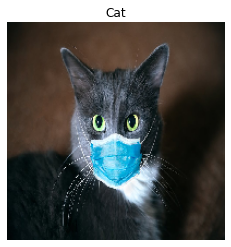

In [47]:

img_name = r"Coronavirus-and-Cats-Science-Roundup-Catipilla.jpg"
img_file_path = os.path.join(current_working_dir, 'CatsAndDogs','online_test_images',img_name)

#img_file_path = r"/CatsAndDogs/online_test_images/Coronavirus-and-Cats-Science-Roundup-Catipilla.jpg"

img = keras.preprocessing.image.load_img( img_file_path, target_size=new_img_size)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predicted_class = loaded_model.predict_classes(img_array)[0]
predictions = loaded_model.predict(img_array)
score = predictions[0]

print("Prediction: ",class_names[predicted_class[0]])
print("Score: ", np.round(score,2))

plt.figure()
plt.imshow(img)
plt.title(class_names[i])
plt.axis("off")

# Visualize layers

Grab the first convolutional layer. We have 16 filters of shape 3x3, for each RGB color channels. i.e. total 16 x 3 fitlers of shape 3x3. We will plot these filters, each color channel in a new column

In [88]:
print("Total layers: ", len(loaded_model.layers))

print("Convolutional layers: Name, shape")
for i,layer in enumerate(loaded_model.layers):
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print("Index: ", i, "| Name of the layer: ", layer.name, "| Shape: ", filters.shape)
    

Total layers:  27
Convolutional layers: Name, shape
Index:  3 | Name of the layer:  conv2d_10 | Shape:  (3, 3, 3, 16)
Index:  7 | Name of the layer:  conv2d_11 | Shape:  (3, 3, 16, 32)
Index:  11 | Name of the layer:  conv2d_12 | Shape:  (3, 3, 32, 32)
Index:  15 | Name of the layer:  conv2d_13 | Shape:  (3, 3, 32, 64)
Index:  19 | Name of the layer:  conv2d_14 | Shape:  (3, 3, 64, 256)


Grab first convolutional layer, indexed 3, get the weights, normalize the values to 0-1 range.

<IPython.core.display.Javascript object>


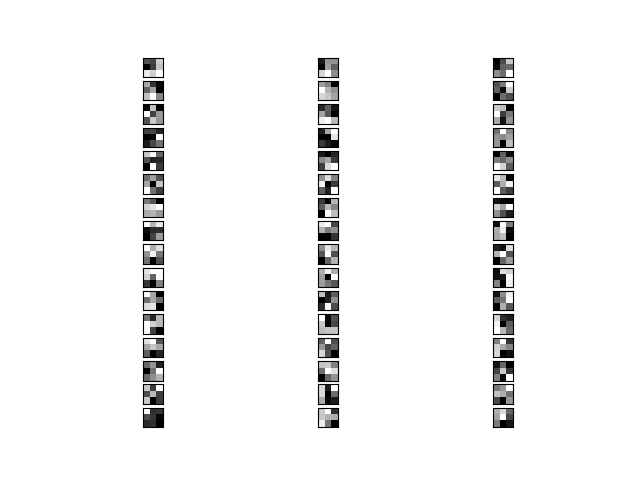

In [82]:
# retrieve weights from the second hidden layer
filters, biases = loaded_model.layers[3].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot first few filters
n_filters, ix = 16, 1
plt.figure()
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

## Visualize the feature maps

If we convolve an input image with these filters, the resultant images are called feature maps. These feature maps represent what aspects of the image are important do decide if its a cat or a dog.
Lets use the same example image as above and apply all the 16 filters to it and visualize the feature maps.

<IPython.core.display.Javascript object>


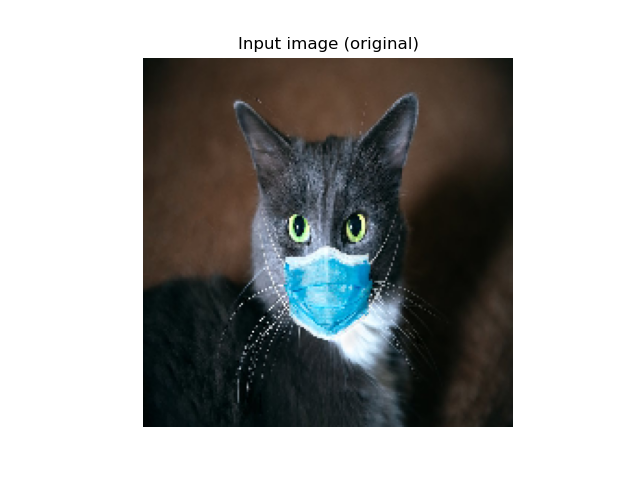

Text(0.5, 1.0, 'Input image (original)')

In [87]:
# Example image
plt.figure()
plt.imshow(img)
plt.axis("off")
plt.title("Input image (original)")

Create a submodel that is derived from the original model, that return the output of the first convolutional layer indexed at 3.

## Visualize output from 1st convolutional layer

In [104]:
print("Total layers: ", len(loaded_model.layers))

print("Convolutional layers: Name, shape")
for i,layer in enumerate(loaded_model.layers):
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print("Index: ", i, "| Name of the layer: ", layer.name, "| Shape: ", filters.shape)
    

Total layers:  27
Convolutional layers: Name, shape
Index:  3 | Name of the layer:  conv2d_10 | Shape:  (3, 3, 3, 16)
Index:  7 | Name of the layer:  conv2d_11 | Shape:  (3, 3, 16, 32)
Index:  11 | Name of the layer:  conv2d_12 | Shape:  (3, 3, 32, 32)
Index:  15 | Name of the layer:  conv2d_13 | Shape:  (3, 3, 32, 64)
Index:  19 | Name of the layer:  conv2d_14 | Shape:  (3, 3, 64, 256)


In [105]:
# redefine model to output right after the last hidden layer
layer_idx = 3
submodel = Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[layer_idx].output)

There are total 16 filters.

<IPython.core.display.Javascript object>


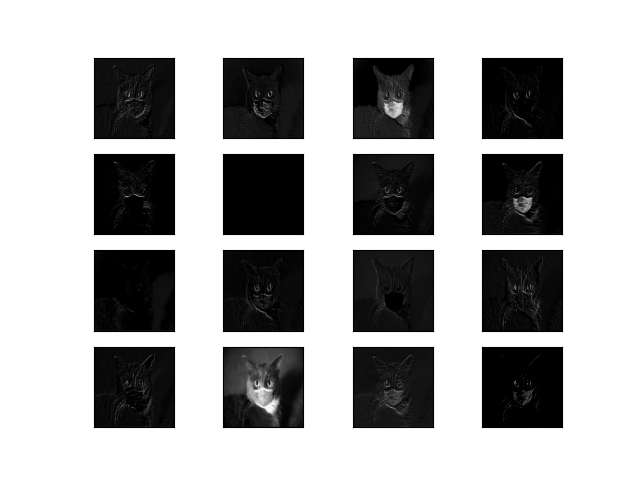

In [86]:
# get feature map for first hidden layer
feature_maps = submodel.predict(img_array)
# plot all 64 maps in an 8x8 squares
square = 4
ix = 1

plt.figure()
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

Note some of the features represent the edges, eyes, texture, outlines of the ears or simply the contrast of the image.

## Visualize output from intermediate convolutional layer


In [89]:
print("Total layers: ", len(loaded_model.layers))

print("Convolutional layers: Name, shape")
for i,layer in enumerate(loaded_model.layers):
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print("Index: ", i, "| Name of the layer: ", layer.name, "| Shape: ", filters.shape)
    

Total layers:  27
Convolutional layers: Name, shape
Index:  3 | Name of the layer:  conv2d_10 | Shape:  (3, 3, 3, 16)
Index:  7 | Name of the layer:  conv2d_11 | Shape:  (3, 3, 16, 32)
Index:  11 | Name of the layer:  conv2d_12 | Shape:  (3, 3, 32, 32)
Index:  15 | Name of the layer:  conv2d_13 | Shape:  (3, 3, 32, 64)
Index:  19 | Name of the layer:  conv2d_14 | Shape:  (3, 3, 64, 256)


In [93]:
# redefine model to output right after the last hidden layer
layer_idx = 15
submodel = Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[layer_idx].output)

There are total 64 filters.

<IPython.core.display.Javascript object>


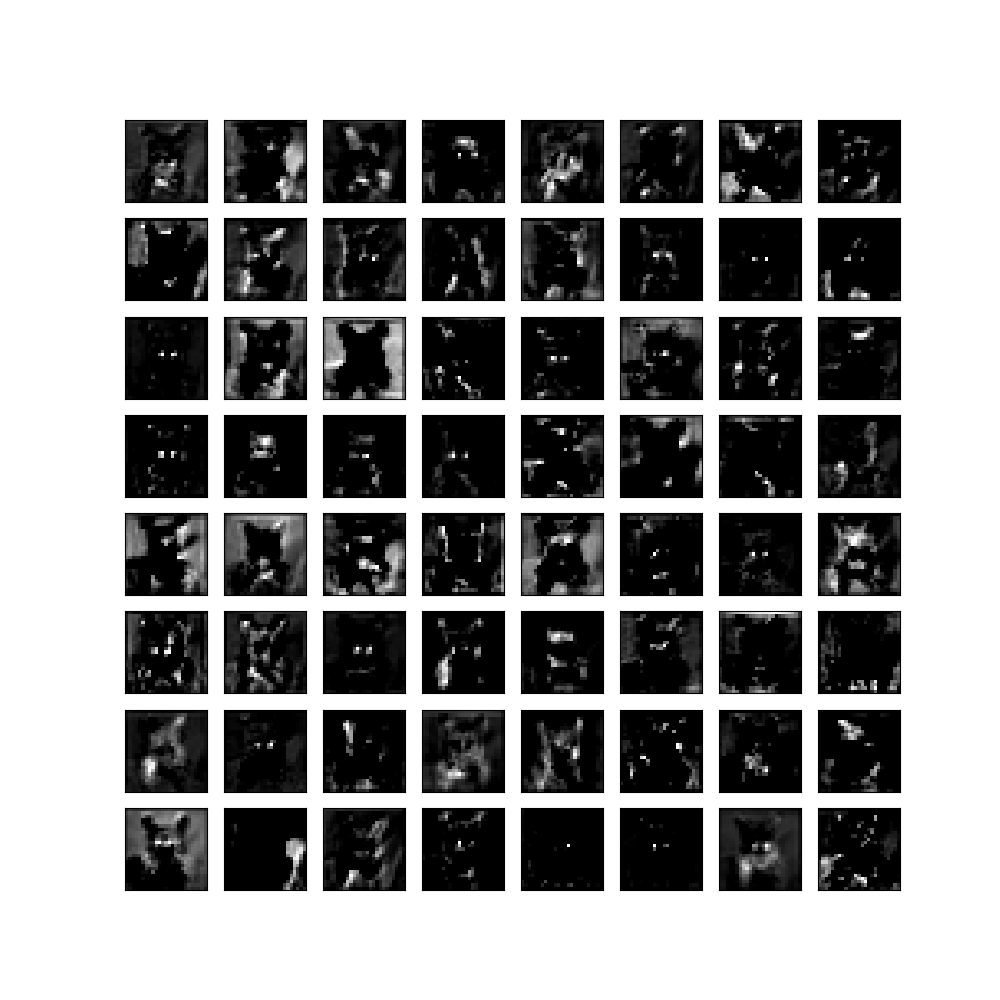

In [95]:
# get feature map for first hidden layer
feature_maps = submodel.predict(img_array)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1

plt.figure(figsize=(10,10))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

## Visualize output from last convolutional layer


In [98]:
print("Total layers: ", len(loaded_model.layers))

print("Convolutional layers: Name, shape")
for i,layer in enumerate(loaded_model.layers):
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print("Index: ", i, "| Name of the layer: ", layer.name, "| Shape: ", filters.shape)
    

Total layers:  27
Convolutional layers: Name, shape
Index:  3 | Name of the layer:  conv2d_10 | Shape:  (3, 3, 3, 16)
Index:  7 | Name of the layer:  conv2d_11 | Shape:  (3, 3, 16, 32)
Index:  11 | Name of the layer:  conv2d_12 | Shape:  (3, 3, 32, 32)
Index:  15 | Name of the layer:  conv2d_13 | Shape:  (3, 3, 32, 64)
Index:  19 | Name of the layer:  conv2d_14 | Shape:  (3, 3, 64, 256)


In [100]:
# redefine model to output right after the last hidden layer
layer_idx = 19
submodel = Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[layer_idx].output)

There are total 256 filters.

<IPython.core.display.Javascript object>


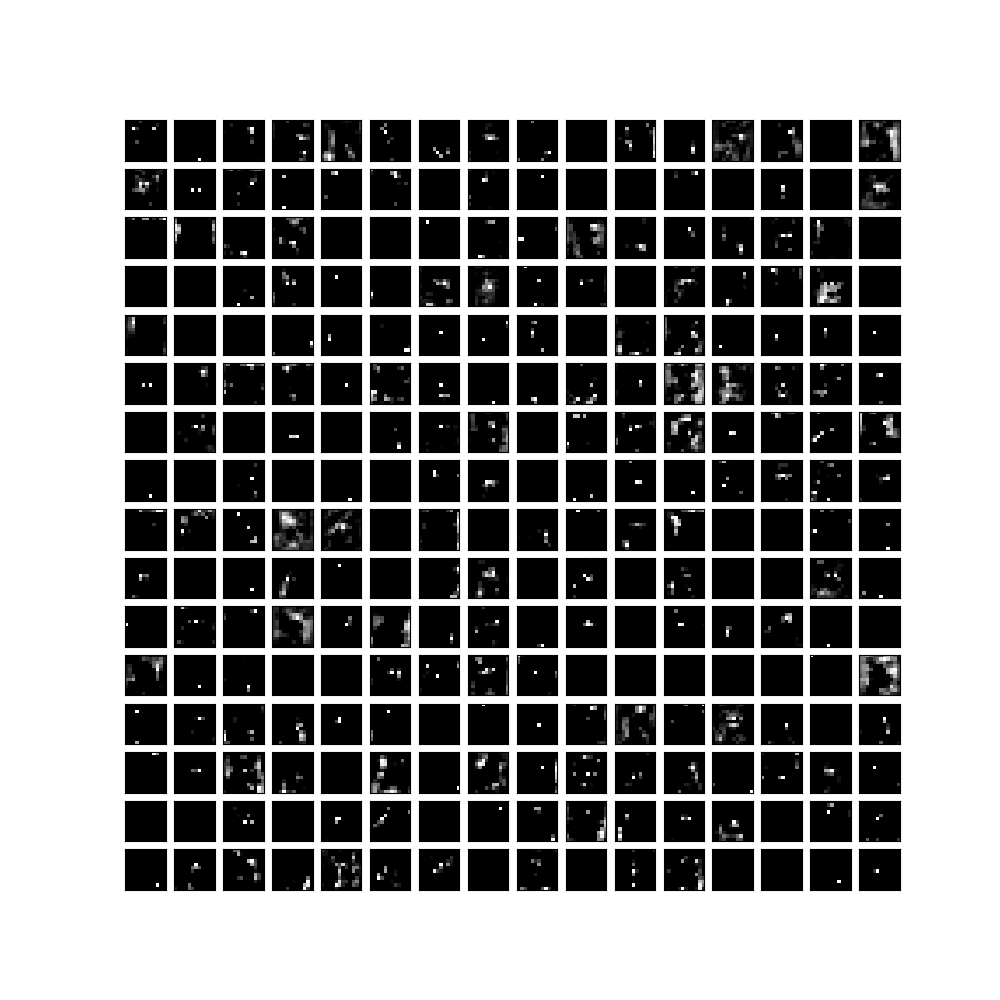

In [102]:
# get feature map for first hidden layer
feature_maps = submodel.predict(img_array)
# plot all 64 maps in an 8x8 squares
square = 16
ix = 1

plt.figure(figsize=(10,10))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

At this stage the features start becoming more and more abstract, since these features are derived from the feature maps pass on from the previous layer. From these images its hard to tell if the network saw a cat or not!

In [103]:
print(feature_maps.shape)

(1, 12, 12, 256)
